In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Loan_Data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Loan_Status

<AxesSubplot:>

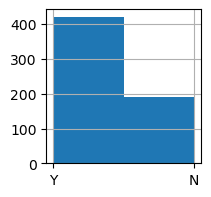

In [21]:
plt.figure(figsize=(2, 2))
df['Loan_Status'].hist(bins=2)

### Histograms / Bars

<AxesSubplot:xlabel='Education', ylabel='count'>

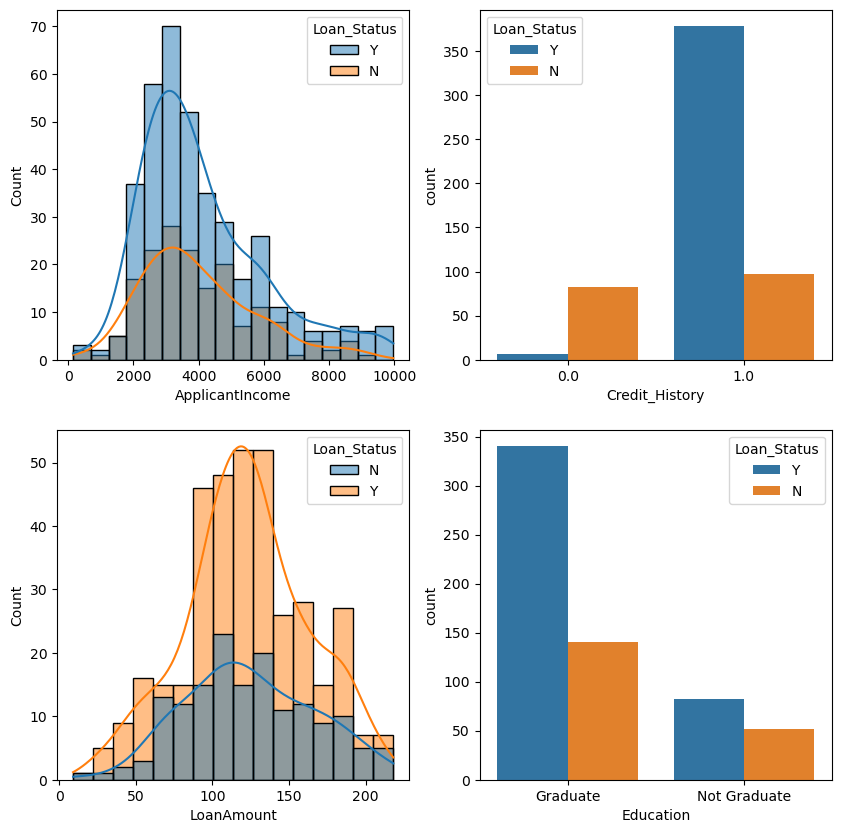

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=df[df["ApplicantIncome"]<10000], x="ApplicantIncome", hue="Loan_Status",  kde=True, ax=axs[0, 0])
sns.histplot(data=df[df['LoanAmount']<220], x="LoanAmount", hue="Loan_Status", kde=True, ax=axs[1, 0])
sns.countplot(data=df, x="Credit_History", hue="Loan_Status", ax=axs[0, 1])
#sns.countplot(data=df, x="Property_Area", hue="Loan_Status", ax=axs[1, 1])
sns.countplot(data=df, x="Education", hue="Loan_Status", ax=axs[1, 1])


### Scatter plots 

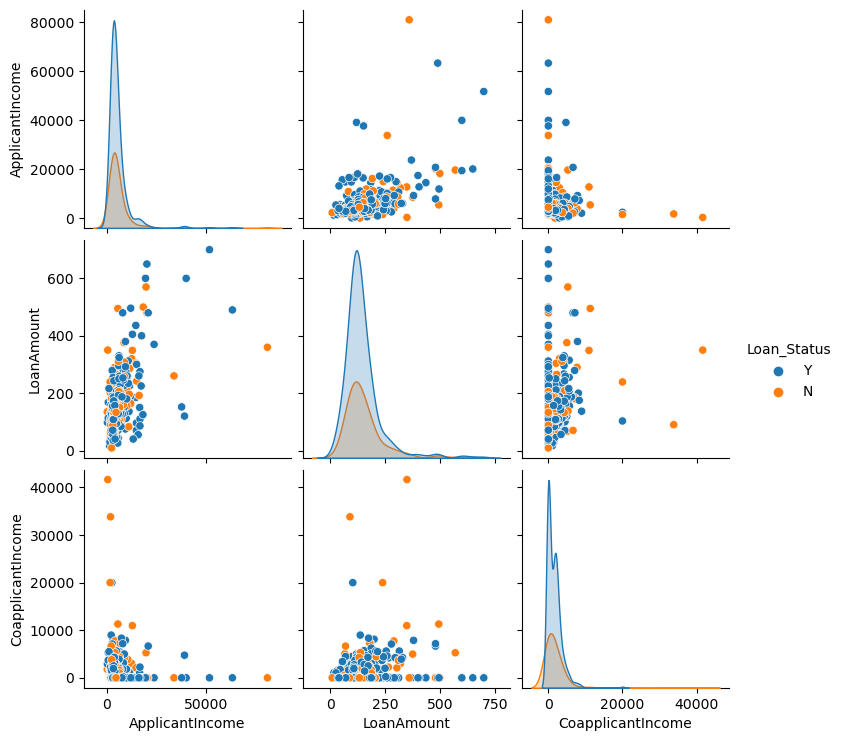

In [293]:
sns.pairplot(data=df[['ApplicantIncome','LoanAmount','Loan_Status','CoapplicantIncome']],hue='Loan_Status')

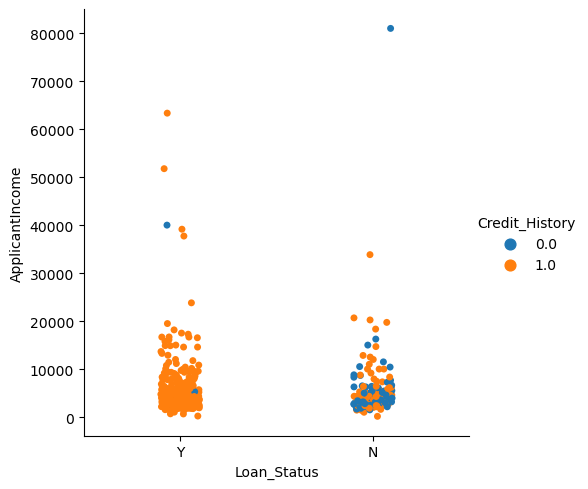

In [46]:
sns.catplot(data=df, y='ApplicantIncome', x='Loan_Status',hue='Credit_History')

### Bars

<AxesSubplot:xlabel='Property_Area', ylabel='Count'>

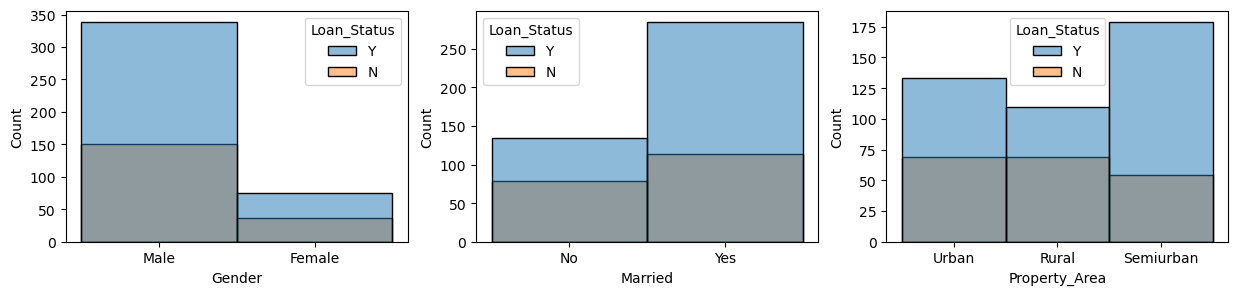

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
pp = sns.histplot(data=df, x='Gender', hue='Loan_Status', ax=axs[0])
sns.histplot(data=df, x='Married', hue='Loan_Status', ax=axs[1])
sns.histplot(data=df, x='Property_Area', hue='Loan_Status', ax=axs[2])

In [58]:
from sklearn.model_selection import train_test_split

## Feature engineering 



In [437]:
df['Dependents'] = df['Dependents'].map({'0':0, '1':1, '2': 2, '3+':3})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [51]:
df1 = df.drop('Loan_ID',axis=1)
df1 = pd.get_dummies(df1, drop_first=True)
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [307]:
df1.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
Loan_Status_Y               0
dtype: int64

In [52]:
df1 = df1.dropna()

In [53]:
df1.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [54]:
X = df1.drop('Loan_Status_Y',axis=1)
y = df1['Loan_Status_Y']

### Headmap

<AxesSubplot:>

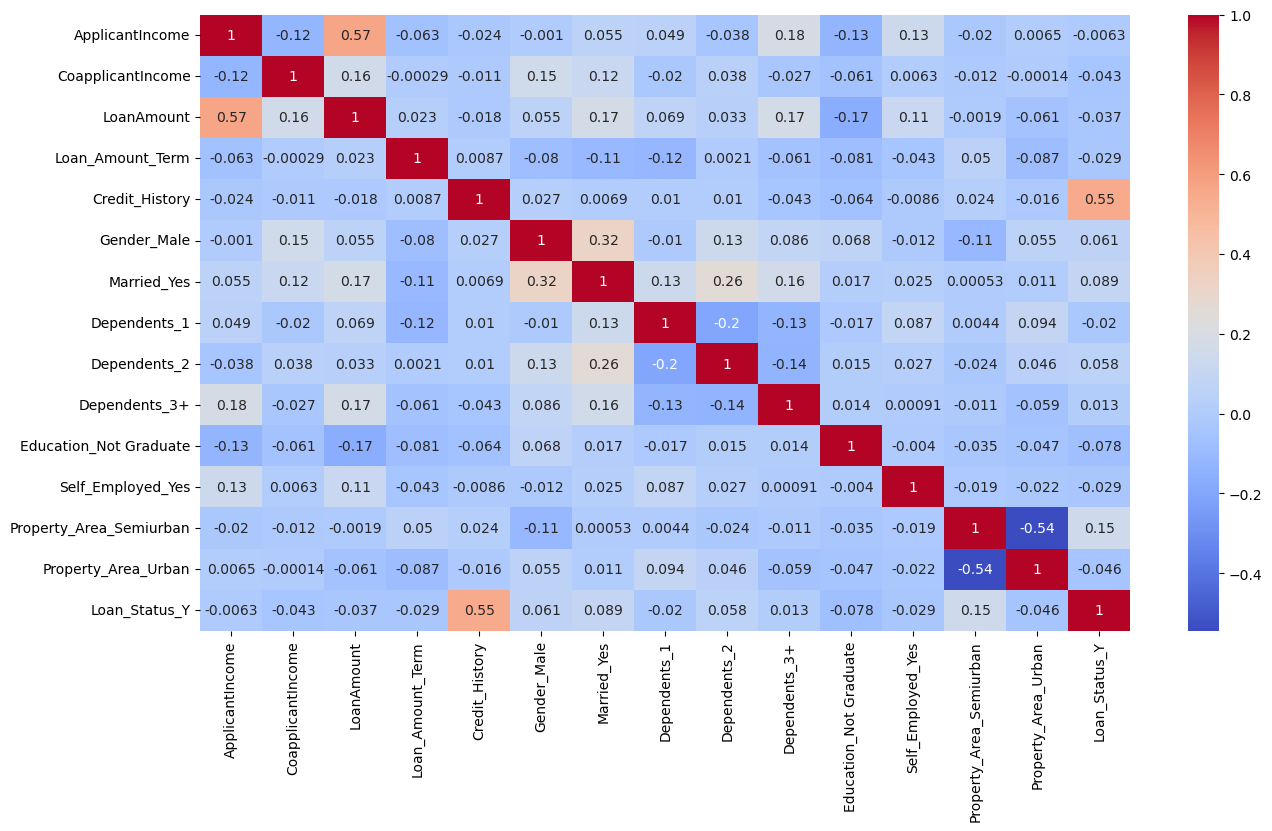

In [55]:
plt.figure(figsize = (15,8))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

In [56]:
pd.Series(abs(df1.corr()['Loan_Status_Y'])).sort_values()

ApplicantIncome            0.006281
Dependents_3+              0.012706
Dependents_1               0.020169
Loan_Amount_Term           0.028601
Self_Employed_Yes          0.029373
LoanAmount                 0.036642
CoapplicantIncome          0.043353
Property_Area_Urban        0.045591
Dependents_2               0.057765
Gender_Male                0.061462
Education_Not Graduate     0.078434
Married_Yes                0.089226
Property_Area_Semiurban    0.145712
Credit_History             0.547439
Loan_Status_Y              1.000000
Name: Loan_Status_Y, dtype: float64

### Multicollinearity
Variance inflation factor

In [316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [442]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature        VIF
0                Dependents   1.904280
1           ApplicantIncome   2.819687
2         CoapplicantIncome   1.558983
3                LoanAmount   6.652136
4          Loan_Amount_Term  10.752150
5            Credit_History   6.256959
6               Gender_Male   5.321662
7               Married_Yes   3.595635
8    Education_Not Graduate   1.275773
9         Self_Employed_Yes   1.176176
10  Property_Area_Semiurban   2.251864
11      Property_Area_Urban   1.935979


In [443]:
X = X.drop('Loan_Amount_Term',axis=1)

In [444]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feabture
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature       VIF
0                Dependents  1.903775
1           ApplicantIncome  2.809570
2         CoapplicantIncome  1.558744
3                LoanAmount  5.971573
4            Credit_History  4.630460
5               Gender_Male  4.880862
6               Married_Yes  3.594090
7    Education_Not Graduate  1.250058
8         Self_Employed_Yes  1.174278
9   Property_Area_Semiurban  2.024673
10      Property_Area_Urban  1.811004


#### Data Spliting and Feature scaling

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling 

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb


In [64]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(max_iter=1000000)))

# Neural Network
# models.append(('NN', MLPClassifier(max_iter=2000)))

# Ensemble Models
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('XGB', xgb.XGBClassifier()))

In [65]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### Cross validation
Mean Accuracy & Standard Deviation

In [86]:
res = pd.DataFrame(columns=['model', 'mean', 'std'])
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    res = pd.concat([res,pd.DataFrame({'model': [name], 'mean': [cv_results.mean()],'std': [cv_results.std()]},columns=['model', 'mean', 'std'] )])
    
    
res = res.reset_index(drop=True)   

LR: 0.802703 (0.034293)
LDA: 0.813514 (0.035135)
KNN: 0.759459 (0.045946)
CART: 0.697297 (0.058966)
NB: 0.786486 (0.030697)
SVC: 0.813514 (0.039073)
AB: 0.778378 (0.043243)
GBM: 0.764865 (0.041957)
RF: 0.800000 (0.043914)
ET: 0.762162 (0.041520)
XGB: 0.772973 (0.030096)


#### Models Performance Comparison

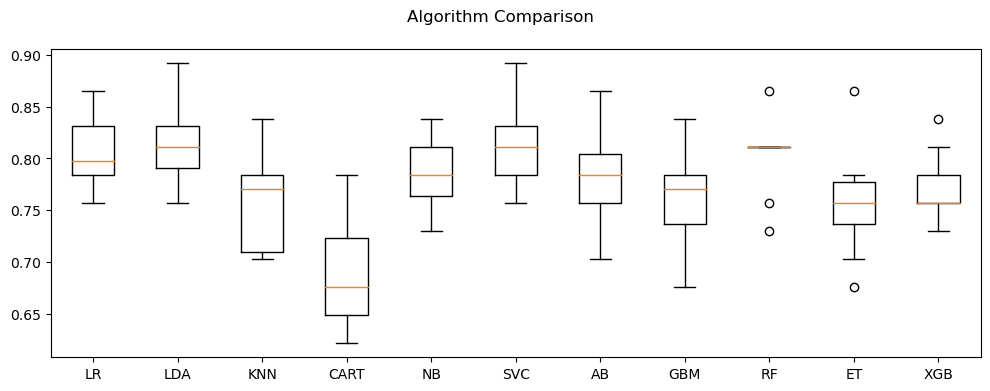

In [68]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(12,4)
pyplot.show()

#### Mean Accuracy of Models

In [105]:
print('res -> the higher the better')
res.sort_values('mean',ascending=False)

res -> the higher the better


,model,mean,std
1,LDA,0.813514,0.035135
5,SVC,0.813514,0.039073
0,LR,0.802703,0.034293
8,RF,0.800000,0.043914
4,NB,0.786486,0.030697
6,AB,0.778378,0.043243
10,XGB,0.772973,0.030096
7,GBM,0.764865,0.041957
9,ET,0.762162,0.041520
2,KNN,0.759459,0.045946


#### Cross validation Accuracy vs Prediction Accuracy

In [81]:
rm = pd.DataFrame(columns=['name','acc'])
for m in models:
    ml = m[1]
    ml.fit(X_train,y_train)
    pred = ml.predict(X_test)
    #print("%f (%s)" % (accuracy_score(p,y_test),m[0]))
    rm = pd.concat([rm, pd.DataFrame({'name':[m[0]],'acc': [accuracy_score(pred,y_test)]})],ignore_index=True)

In [82]:
rm.sort_values('acc',ascending=False)

,name,acc
0,LR,0.817610
1,LDA,0.817610
5,SVC,0.817610
4,NB,0.805031
2,KNN,0.779874
6,AB,0.773585
10,XGB,0.773585
8,RF,0.767296
7,GBM,0.761006
9,ET,0.742138


#### Random Forest for feature_importances_


In [92]:
rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)
p = rf1.predict(X_test)
print( 'Random Forest Model Accuracy: ' + str(round(accuracy_score(p,y_test),2)))

Random Forest Model Accuracy: 0.79


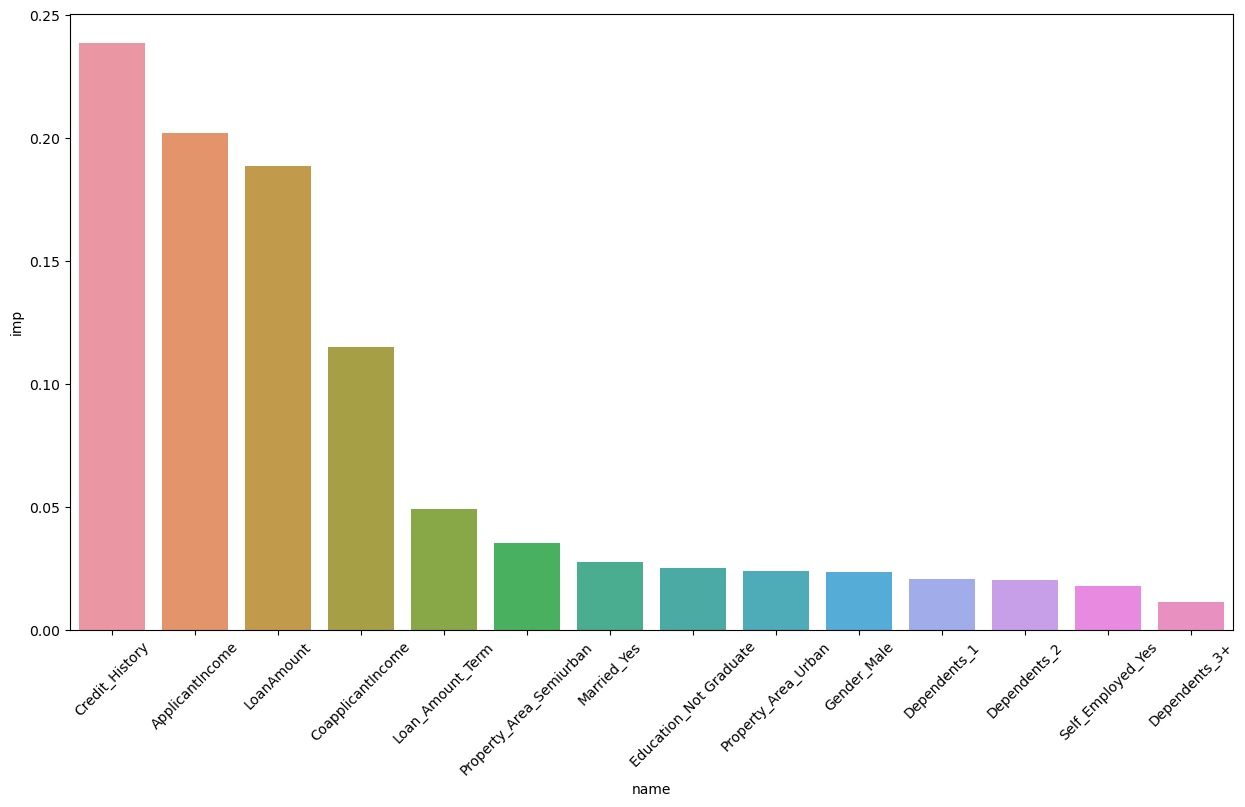

In [93]:
plt.figure(figsize = (15,8))
tbr = pd.DataFrame({'imp': rf1.feature_importances_, 'name': X.columns})
sns.barplot(data=tbr, y='imp', x='name',order=tbr.sort_values('imp',ascending=False).name)
plt.xticks(rotation=45)[0];


In [341]:
tbr.sort_values('imp',ascending=False).name

3              Credit_History
0             ApplicantIncome
2                  LoanAmount
1           CoapplicantIncome
11    Property_Area_Semiurban
5                 Married_Yes
12        Property_Area_Urban
4                 Gender_Male
9      Education_Not Graduate
7                Dependents_2
6                Dependents_1
10          Self_Employed_Yes
8               Dependents_3+
Name: name, dtype: object

### Neural Network

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [96]:
df.shape

(614, 13)

In [97]:
n = Sequential()

In [98]:
n.add(Dense(30,activation='relu'))
n.add(Dropout(0.5))
n.add(Dense(15,activation='relu'))
n.add(Dropout(0.5))
n.add(Dense(1,activation='sigmoid'))


In [99]:
n.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [100]:
hist = n.fit(x=X_train, y=y_train, epochs=100, verbose=1, validation_data=(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 1s 14ms/step - loss: 0.7698 - accuracy: 0.5162 - val_loss: 0.7061 - val_accuracy: 0.4843
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7169 - accuracy: 0.5243 - val_loss: 0.6897 - val_accuracy: 0.5786
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.5703 - val_loss: 0.6762 - val_accuracy: 0.6038
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.6324 - val_loss: 0.6641 - val_accuracy: 0.6352
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.6054 - val_loss: 0.6526 - val_accuracy: 0.7044
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.6595 - val_loss: 0.6427 - val_accuracy: 0.7107
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.6865 - val_loss: 0.6331 - val_accuracy: 0.7233
Epoch 8/100


In [101]:
pred_class = np.where(n.predict(X_test) > 0.5, 1, 0)

5/5 [==============================] - 0s 1ms/step


### Accuracy Score

In [102]:

print( 'Neural Network Accuracy: ' + str(round(accuracy_score(y_test,pred_class),2)))

Neural Network Accuracy: 0.82


In [103]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.93      0.49      0.64        51
           1       0.80      0.98      0.88       108

    accuracy                           0.82       159
   macro avg       0.86      0.74      0.76       159
weighted avg       0.84      0.82      0.81       159



<AxesSubplot:>

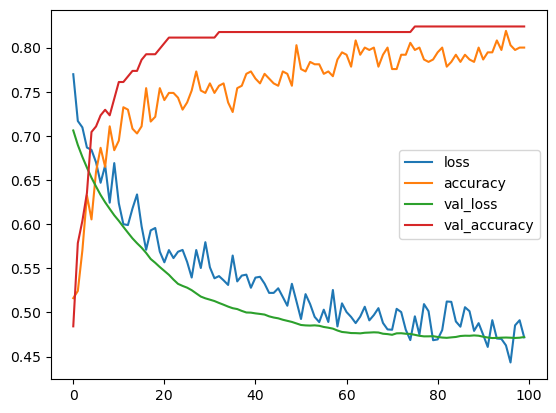

In [104]:
model_loss = pd.DataFrame(hist.history)
model_loss.plot()